In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [61]:
train_transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Load the training set
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/data1/train', transform=train_transforms)

# Create the data loader for the training set
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder('/content/drive/MyDrive/data1/test', transform=train_transforms)

# Create the data loader for the training set
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)


In [64]:
train_dataset.classes

['cat']

In [65]:
#data, labels = next(iter(train_loader))

for data, labels in train_loader:
    print(len(data))



24


In [66]:
len(labels)

24

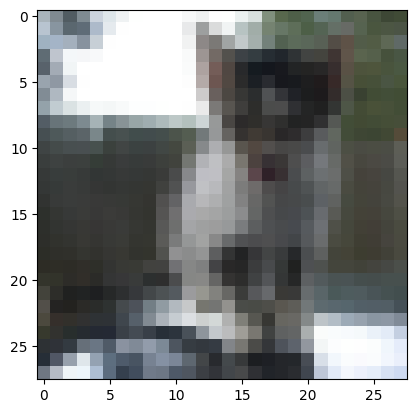

In [67]:
plt.imshow(data[2].permute(1, 2, 0))

torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])


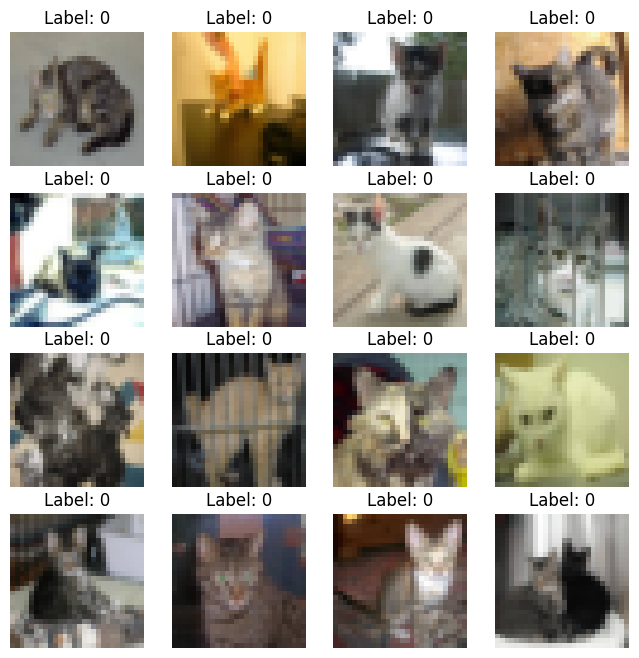

In [68]:


# Plot the first 16 images in the batch and their size
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].permute(1, 2, 0))
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
    print(data[i].shape)
plt.show()

In [69]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [70]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # N, 3, 28, 28
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )


        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.ConvTranspose2d(3, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [71]:
model = Autoencoder()
if torch.cuda.is_available():
    model = model.cuda()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3,
                             weight_decay=1e-5)

In [72]:
num_epochs = 500
outputs = []
outputs1 = []
for epoch in range(num_epochs):
    for (img, _) in train_loader:
        img=img.to(device)
        recon = model(img)
        imgi=img
        img = torch.nn.functional.interpolate(img, size=56, mode='bilinear', align_corners=False)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, imgi, recon))






Epoch:1, Loss:0.0627
Epoch:2, Loss:0.0626
Epoch:3, Loss:0.0625
Epoch:4, Loss:0.0624
Epoch:5, Loss:0.0624
Epoch:6, Loss:0.0623
Epoch:7, Loss:0.0622
Epoch:8, Loss:0.0621
Epoch:9, Loss:0.0621
Epoch:10, Loss:0.0620
Epoch:11, Loss:0.0619
Epoch:12, Loss:0.0618
Epoch:13, Loss:0.0618
Epoch:14, Loss:0.0617
Epoch:15, Loss:0.0616
Epoch:16, Loss:0.0616
Epoch:17, Loss:0.0615
Epoch:18, Loss:0.0614
Epoch:19, Loss:0.0614
Epoch:20, Loss:0.0613
Epoch:21, Loss:0.0612
Epoch:22, Loss:0.0612
Epoch:23, Loss:0.0611
Epoch:24, Loss:0.0611
Epoch:25, Loss:0.0610
Epoch:26, Loss:0.0609
Epoch:27, Loss:0.0609
Epoch:28, Loss:0.0608
Epoch:29, Loss:0.0607
Epoch:30, Loss:0.0607
Epoch:31, Loss:0.0606
Epoch:32, Loss:0.0606
Epoch:33, Loss:0.0605
Epoch:34, Loss:0.0604
Epoch:35, Loss:0.0604
Epoch:36, Loss:0.0603
Epoch:37, Loss:0.0602
Epoch:38, Loss:0.0601
Epoch:39, Loss:0.0600
Epoch:40, Loss:0.0599
Epoch:41, Loss:0.0598
Epoch:42, Loss:0.0597
Epoch:43, Loss:0.0596
Epoch:44, Loss:0.0595
Epoch:45, Loss:0.0594
Epoch:46, Loss:0.05

In [73]:
model.eval()

# iterate over the test dataloader and make predictions
with torch.no_grad():
 for (img, _) in test_loader:
        # get the input image from the data
    img=img.to(device)
    recon1 = model(img)
    imgi=img
    img = torch.nn.functional.interpolate(img, size=56, mode='bilinear', align_corners=False) # resizeing image to 56*56 for calculating loss
    loss1 = criterion(recon1, img)
    # make a prediction using the model
    print(f'Epoch:{epoch+1}, Loss:{loss1.item():.4f}')
    outputs1.append((epoch, imgi, recon1))

Epoch:500, Loss:0.0022


In [74]:
test_dataset.classes

['cat']

In [75]:
import numpy as np
from PIL import Image


(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(56, 56)


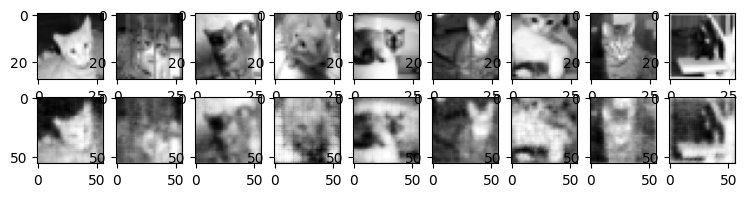

In [76]:

plt.figure(figsize=(9, 2))
plt.gray()
imgs1 = outputs1[0][1].detach().to('cpu').numpy()
recon1 = outputs1[0][2].detach().to('cpu').numpy()
for i, item in enumerate(imgs1):
    if i >= 9: break
    plt.subplot(2, 9, i+1)
    plt.imshow(item[0])
    print(item[0].shape)

for i, item in enumerate(recon1):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1) # row_length + i + 1
    image = item[0]

    plt.imshow(image)
    print(image.shape)